# Load Data and Necessary Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import Data
data = pd.read_csv('train.csv')

In [ ]:
# Print First 10 Columns
data.head(10)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
5,customer_id_24606,48,entrepreneur,married,university.degree,no,yes,yes,cellular,nov,...,2,999,1,failure,-0.07,46.6000,-29.40,5.193,5195.8,0
6,customer_id_13094,34,blue-collar,single,basic.4y,unknown,no,no,cellular,jul,...,2,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1,0
7,customer_id_36912,34,technician,single,professional.course,no,no,no,cellular,jun,...,1,999,0,nonexistent,-2.87,46.4815,-28.56,2.217,5076.2,0
8,customer_id_27834,39,unemployed,single,university.degree,no,yes,no,cellular,mar,...,1,999,0,nonexistent,-1.77,46.4215,-35.00,2.642,5099.1,0
9,customer_id_9302,40,technician,single,professional.course,no,unknown,unknown,telephone,jun,...,3,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1,0


# Data Exploration

In [4]:
# Check for Missing Values
data.isna().sum()

,0
customer_id,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0


# Since there are no missing values in the dataset, we are good to go

In [5]:
# Run a Descriptive Statistics on the Numerical Features
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


A brief look at the difference between the 50%, 75% percentile and the max values for the age, duration and campaign highlights the presence of possible outliers

Let's confirm the presence of these outliers visually using a box plot

In [6]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

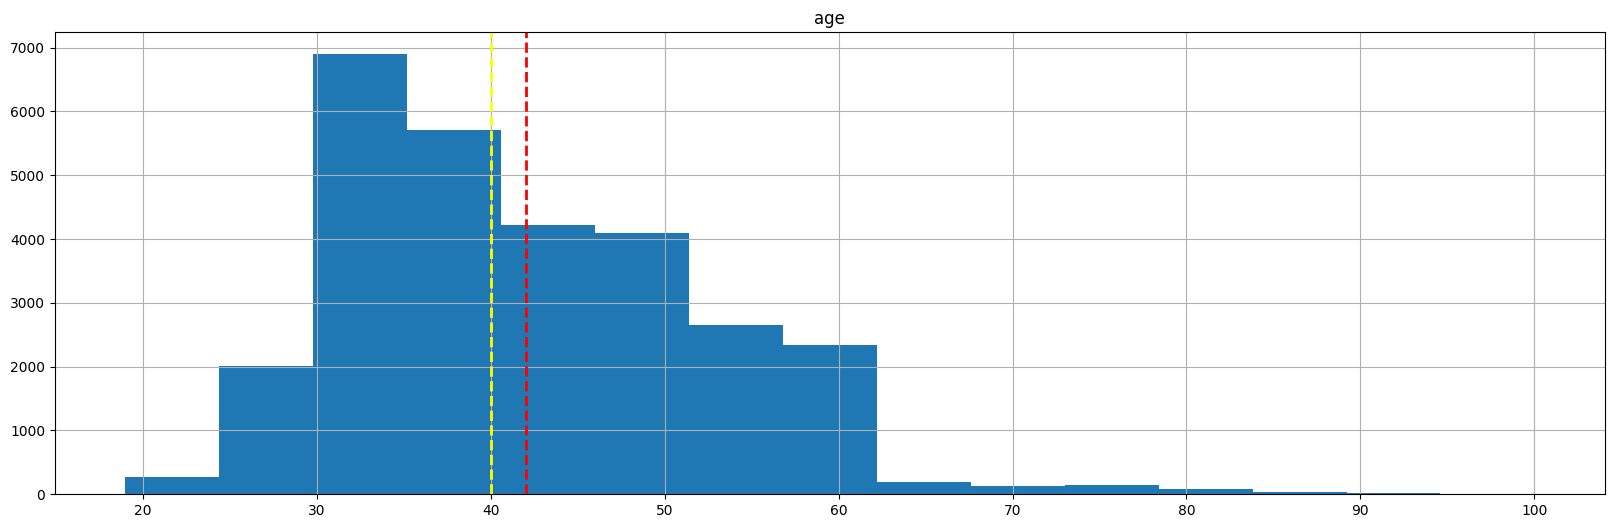

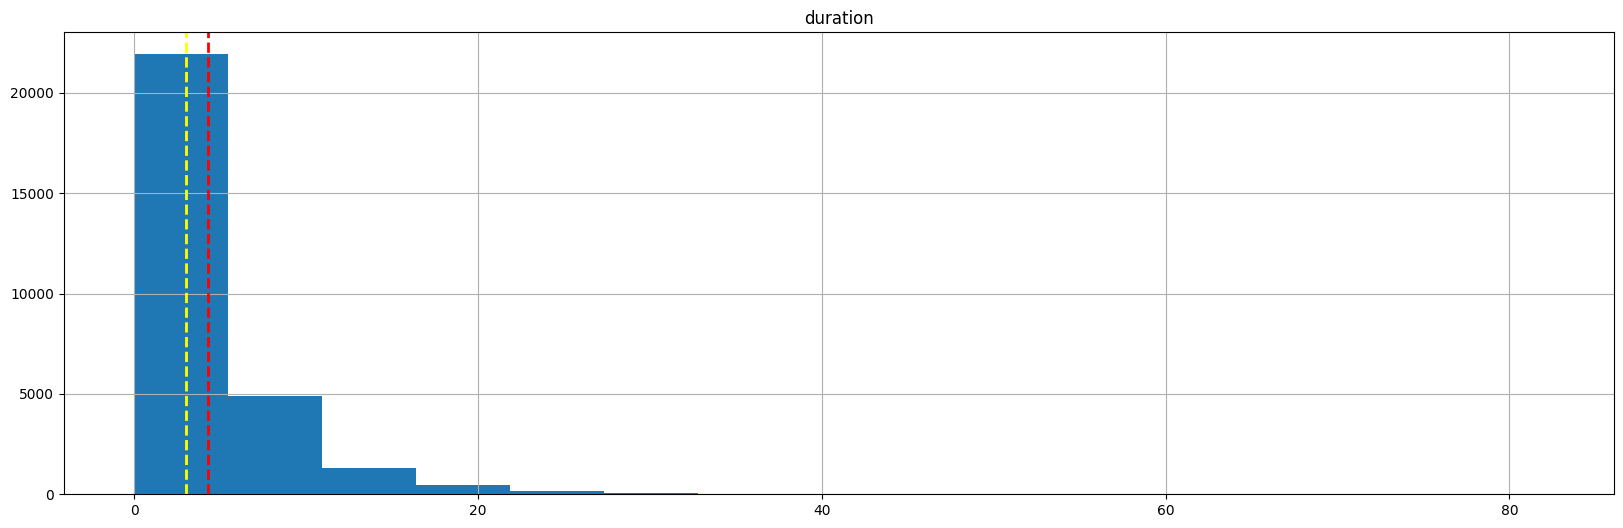

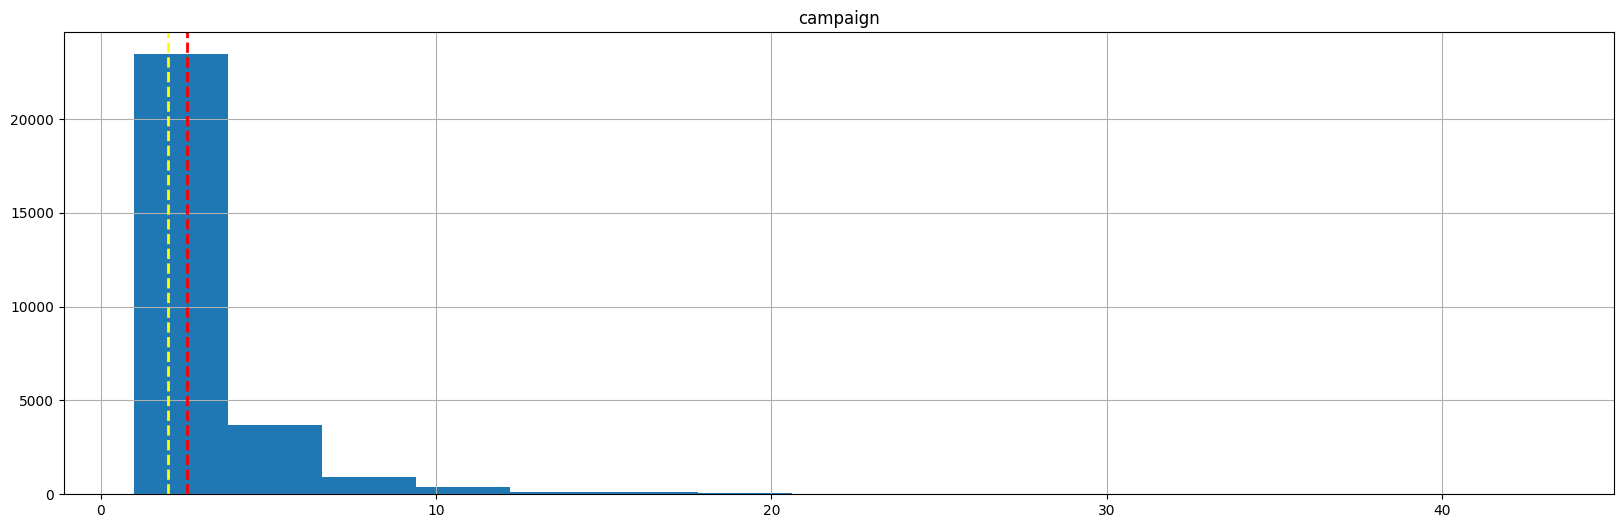

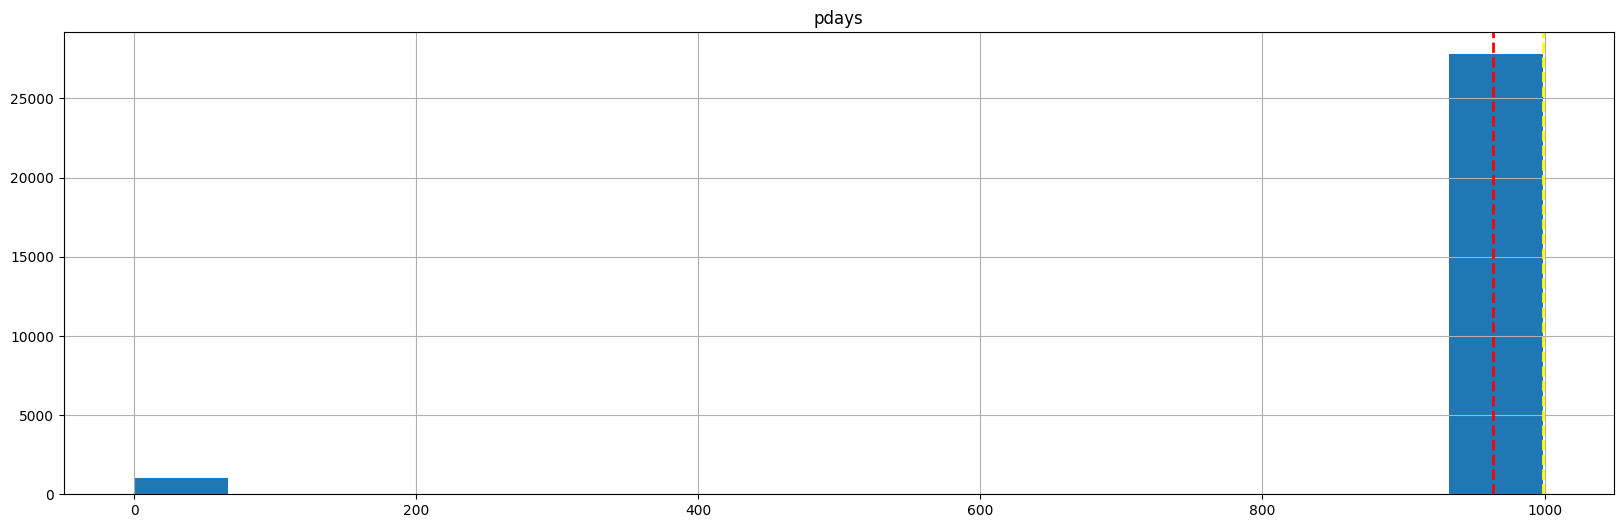

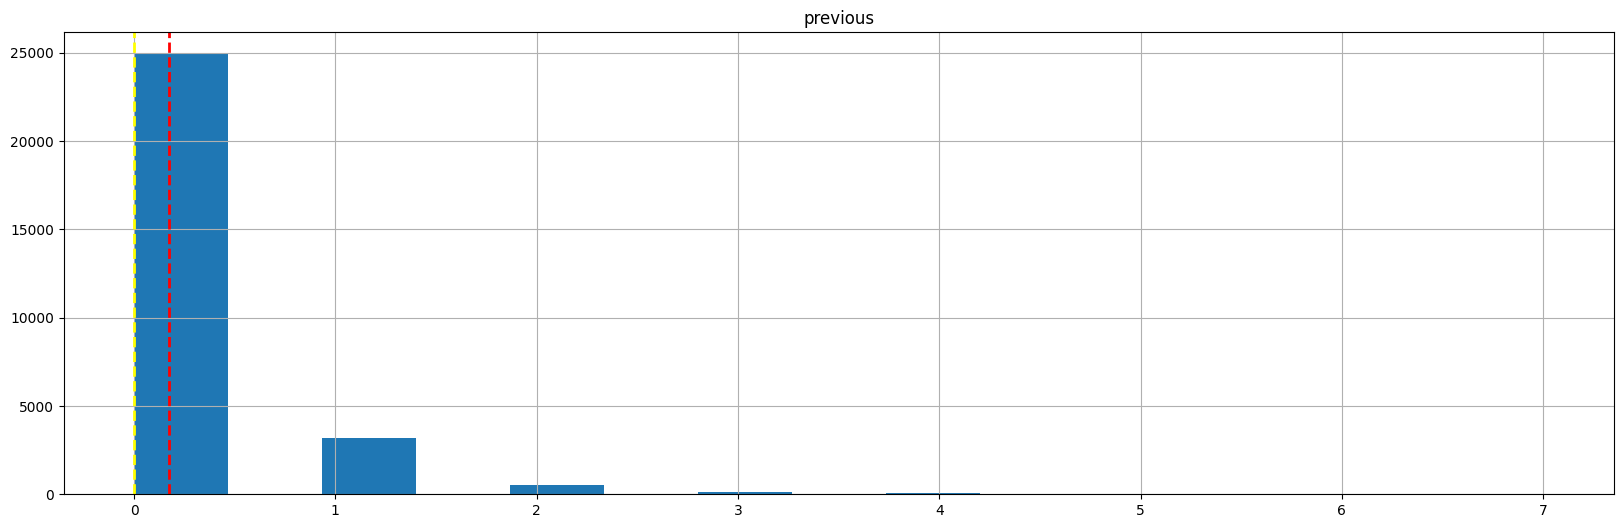

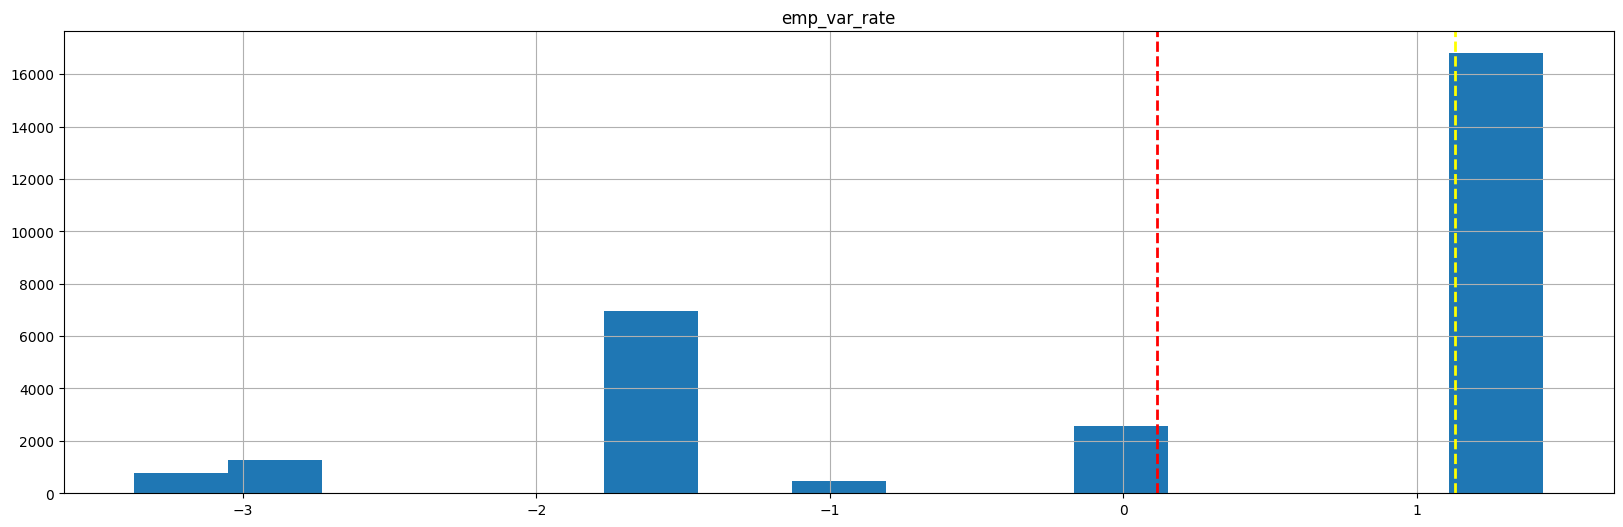

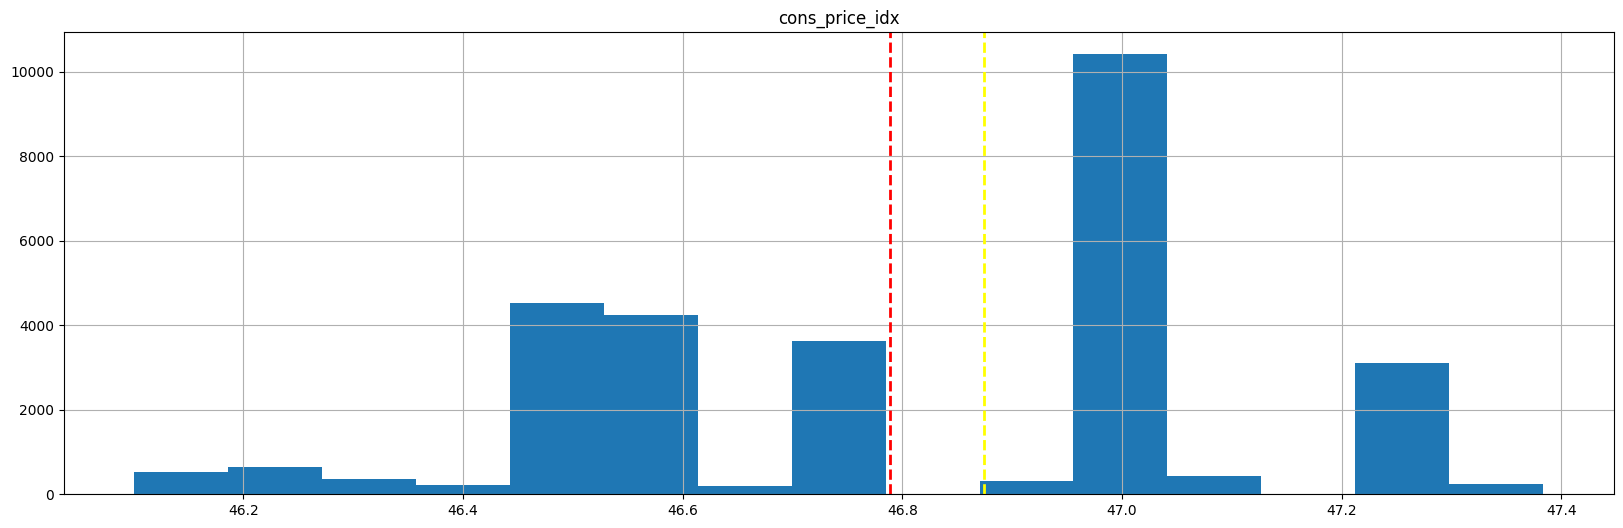

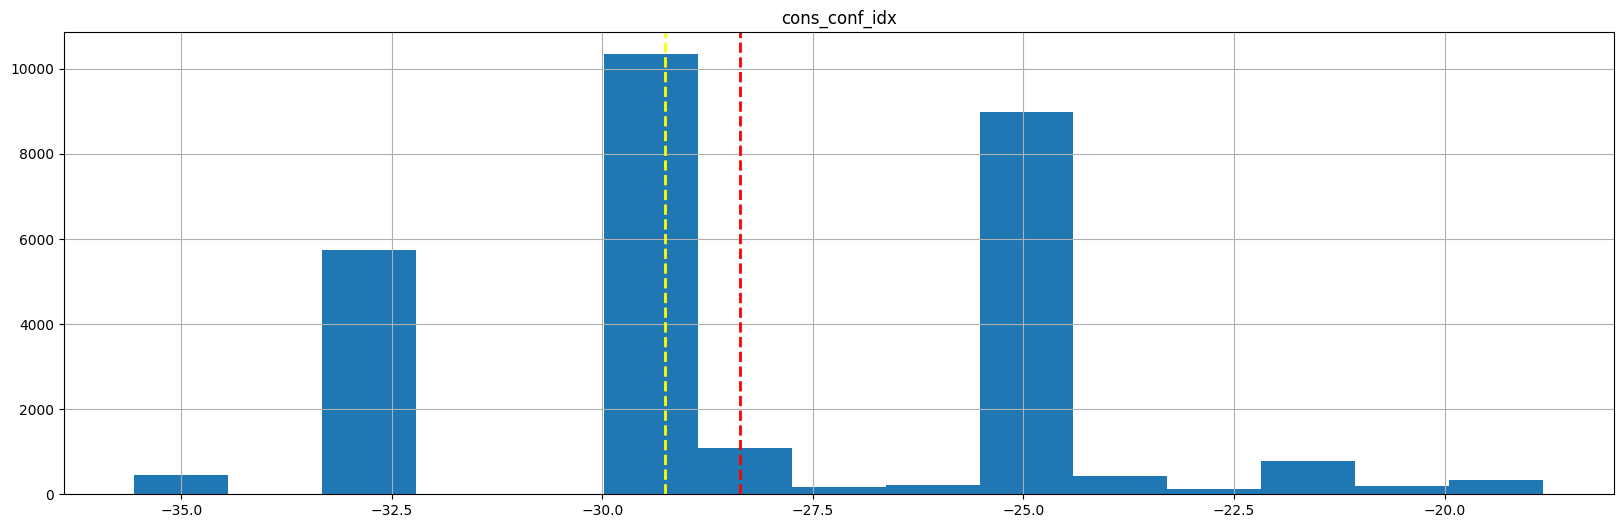

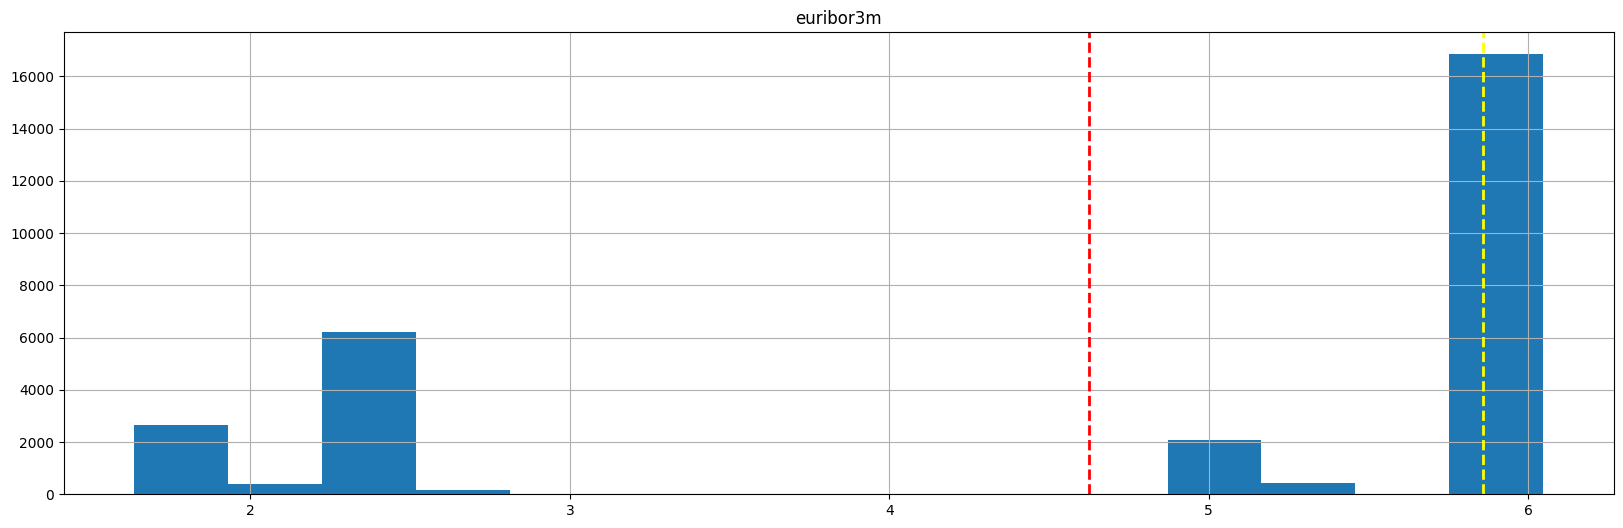

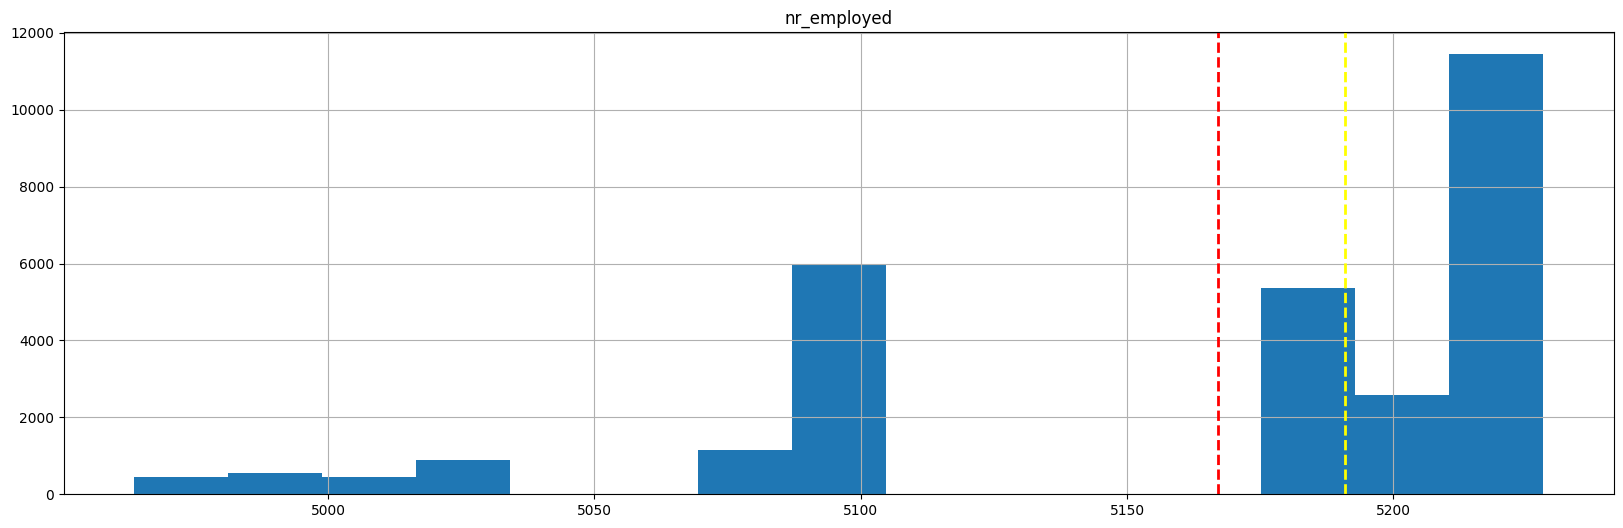

In [7]:
#Show the distribution of each numeric variable
for column in numeric_features:
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    variable = data[column]
    variable.hist(bins=15, ax = ax)
    ax.axvline(variable.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(variable.median(), color='yellow', linestyle='dashed', linewidth=2)
    ax.set_title(column)
plt.show()

Check the distribution of the categorical variables

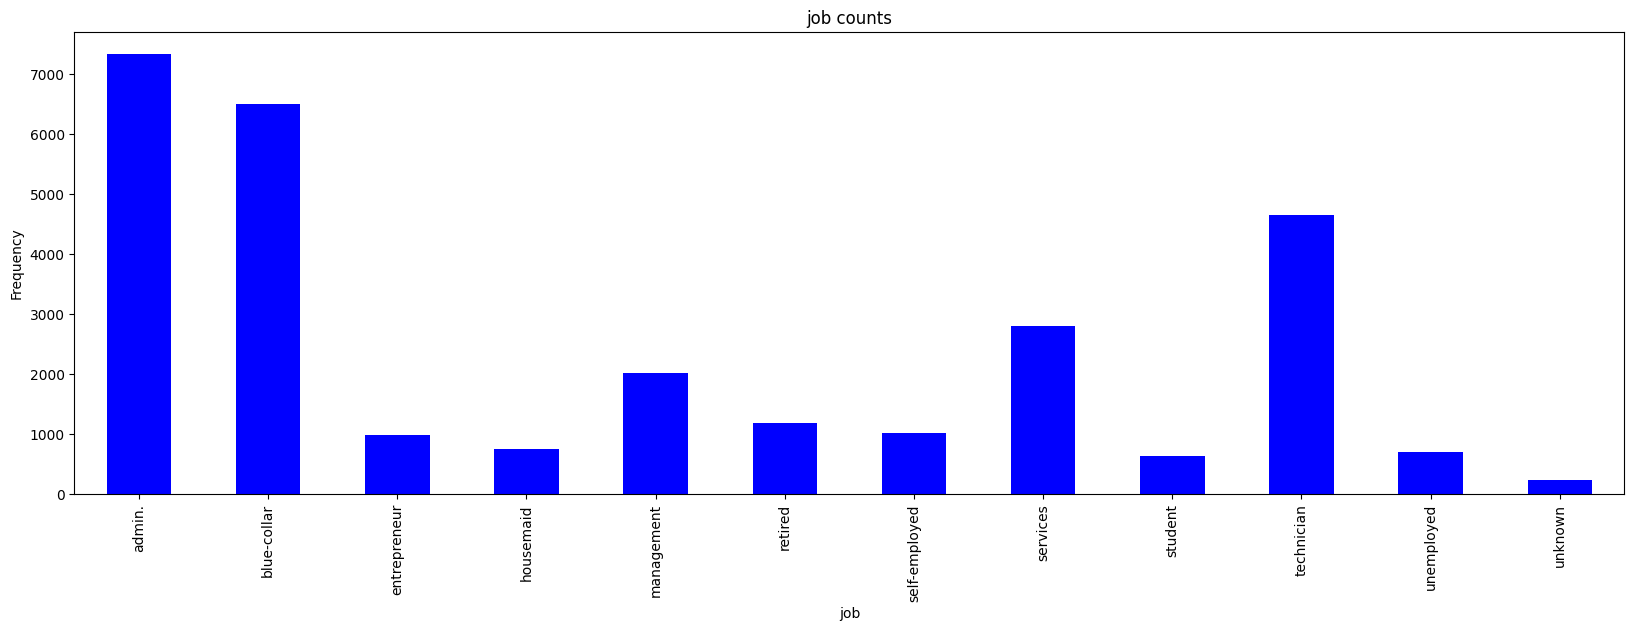

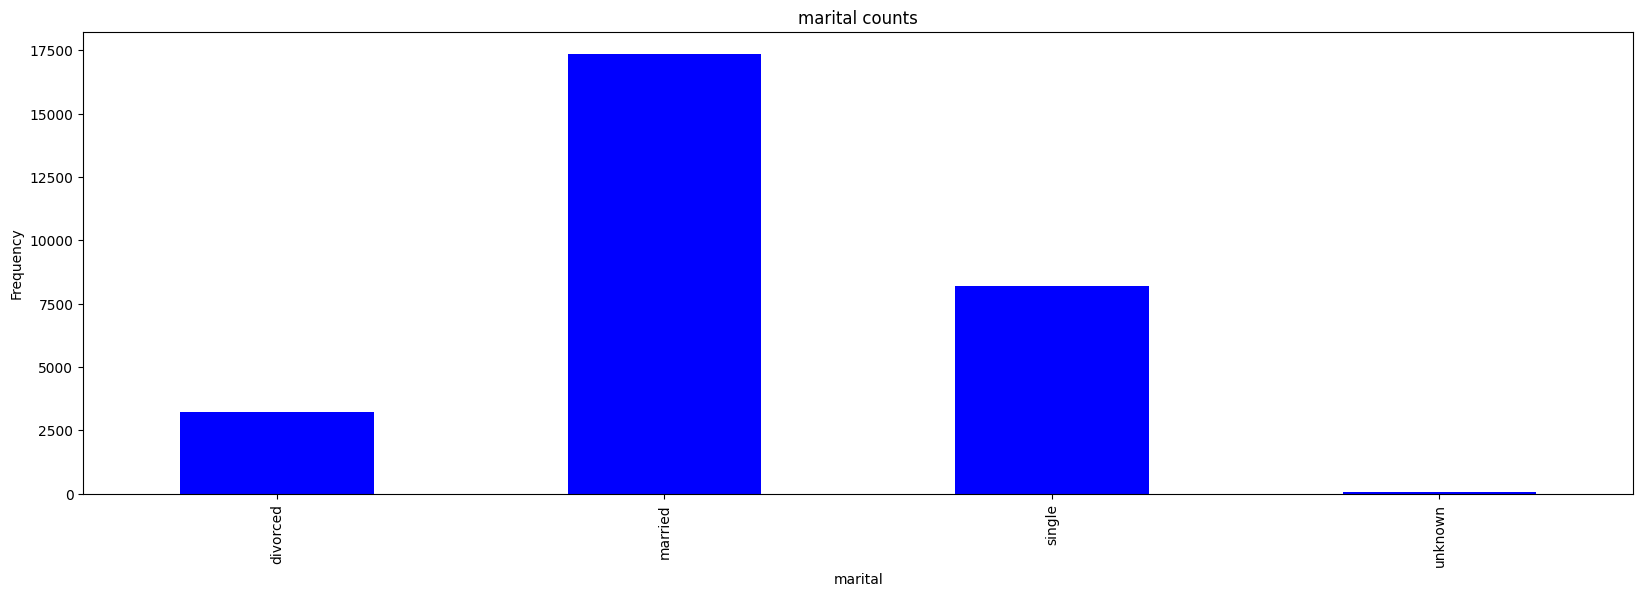

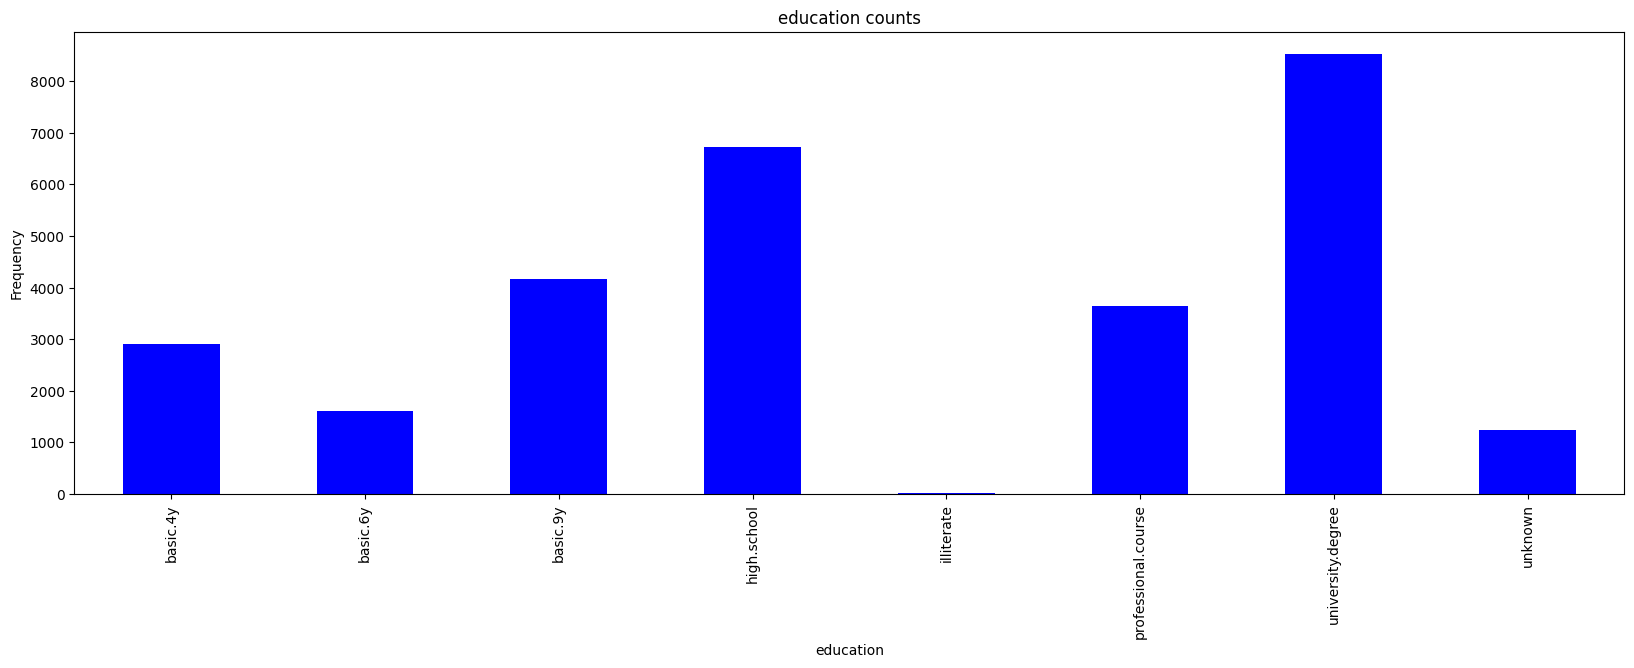

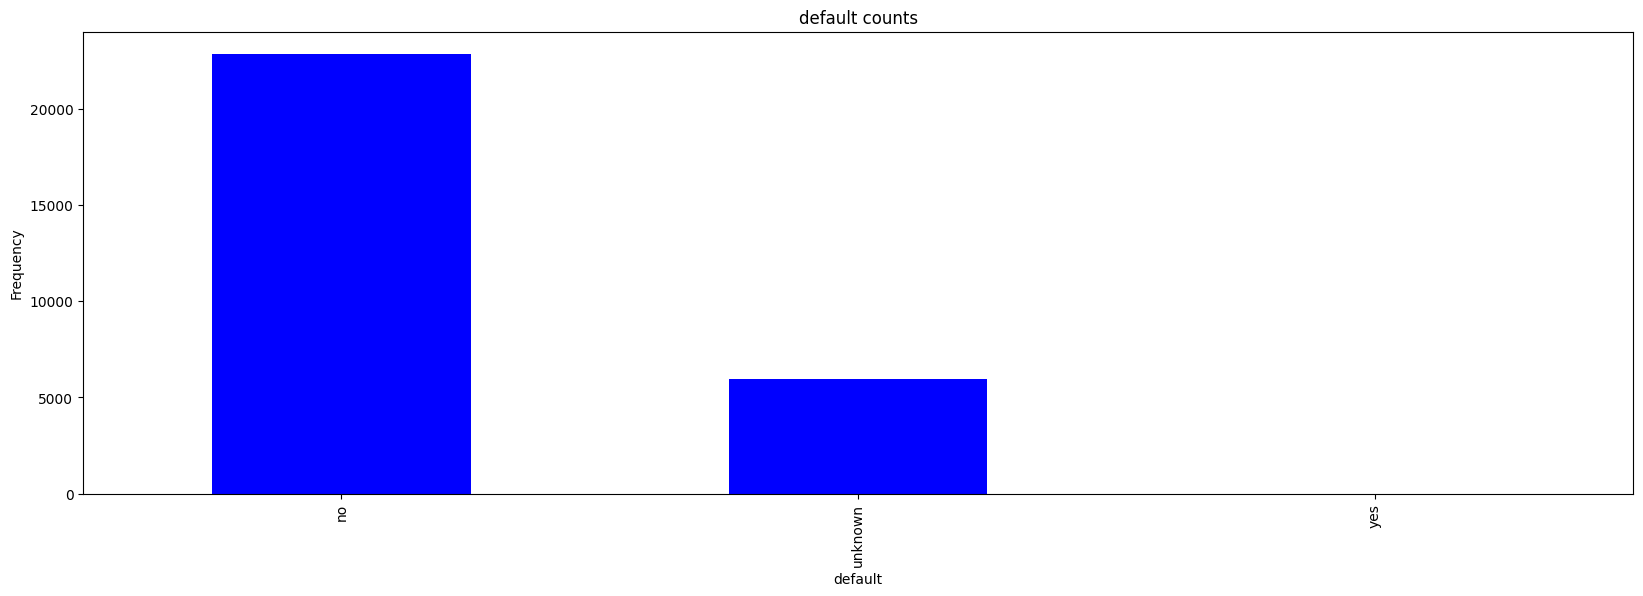

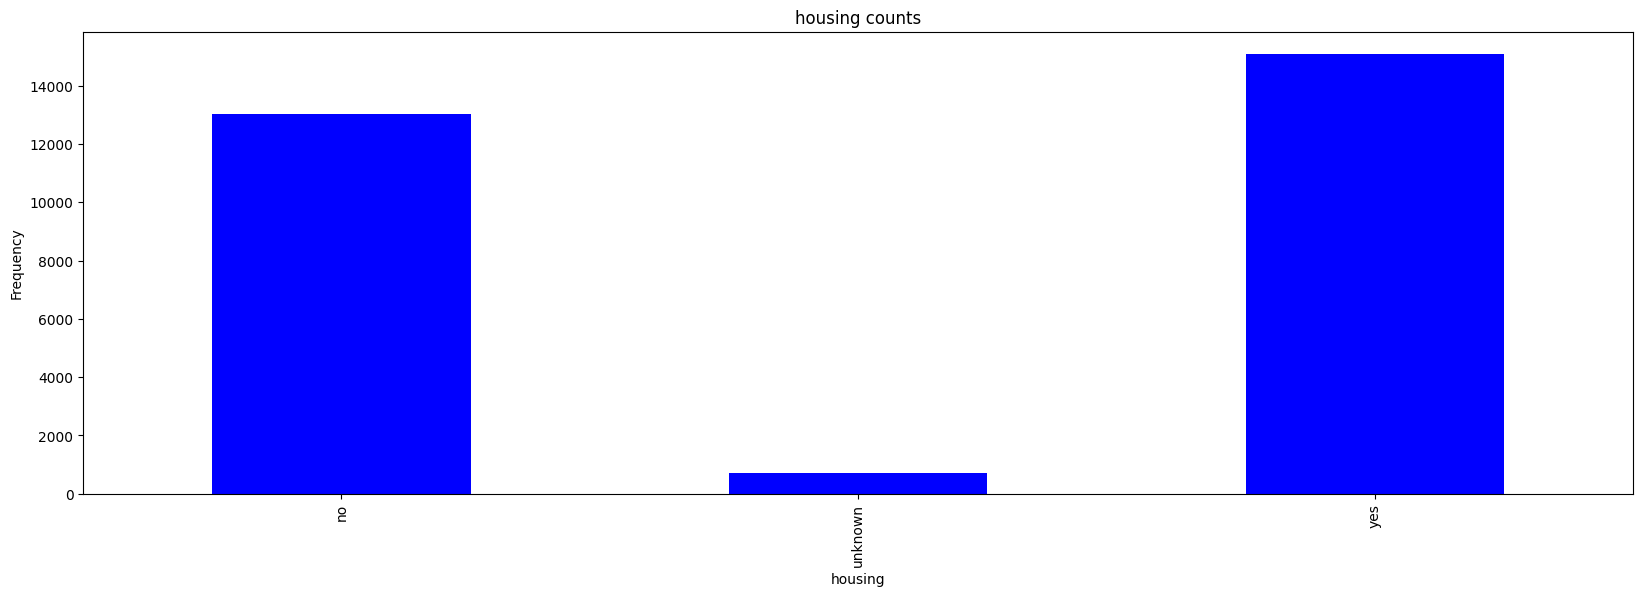

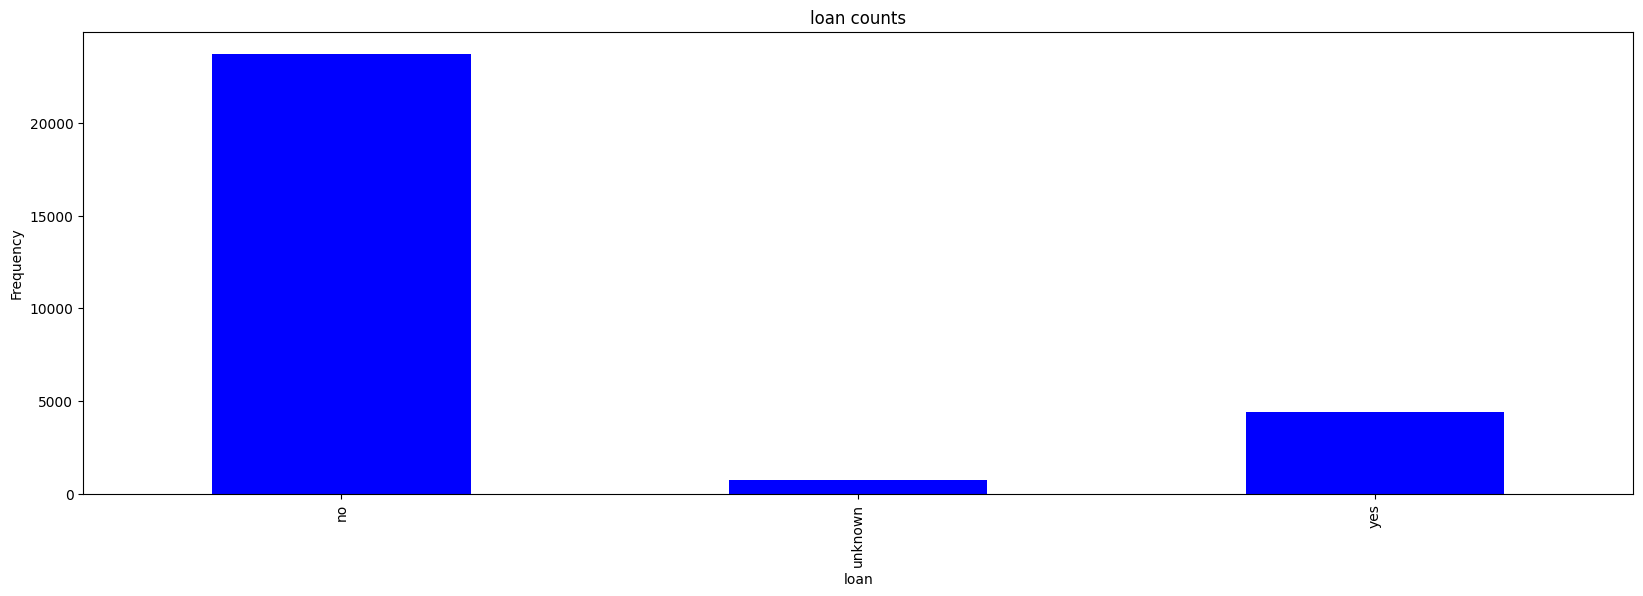

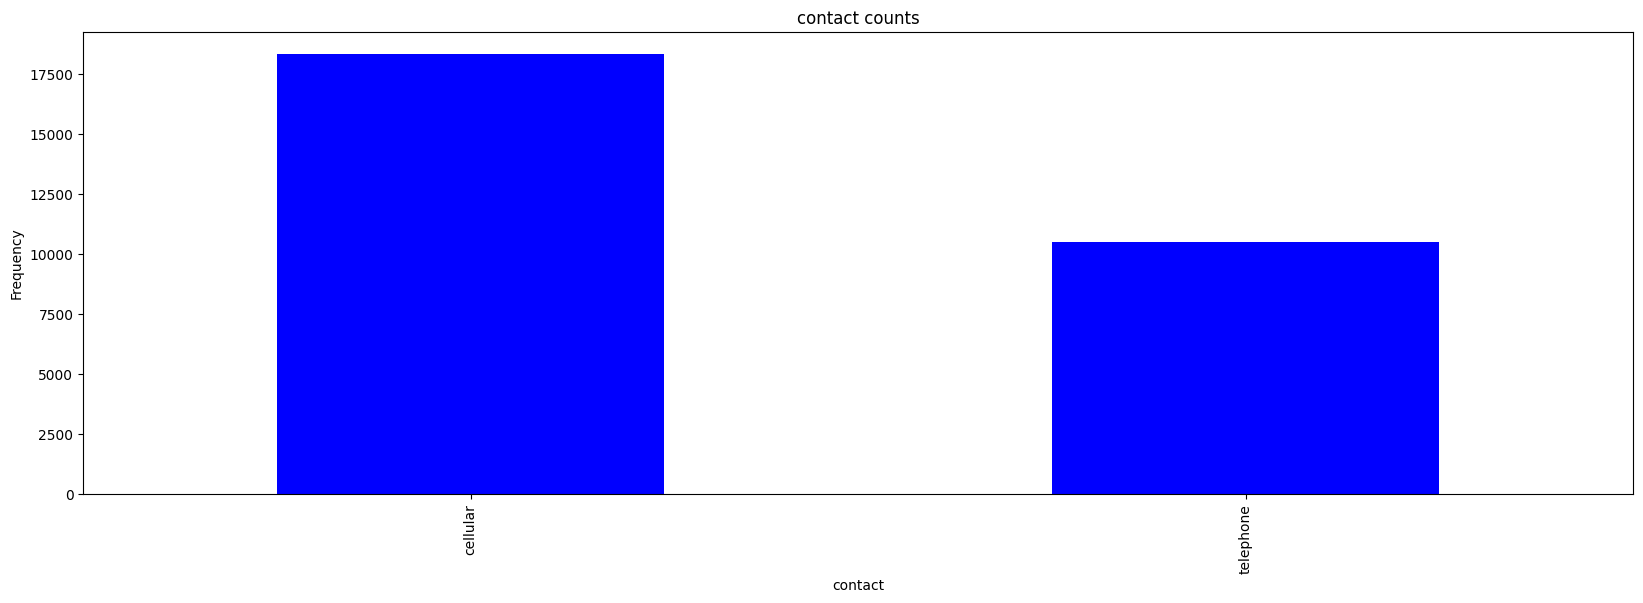

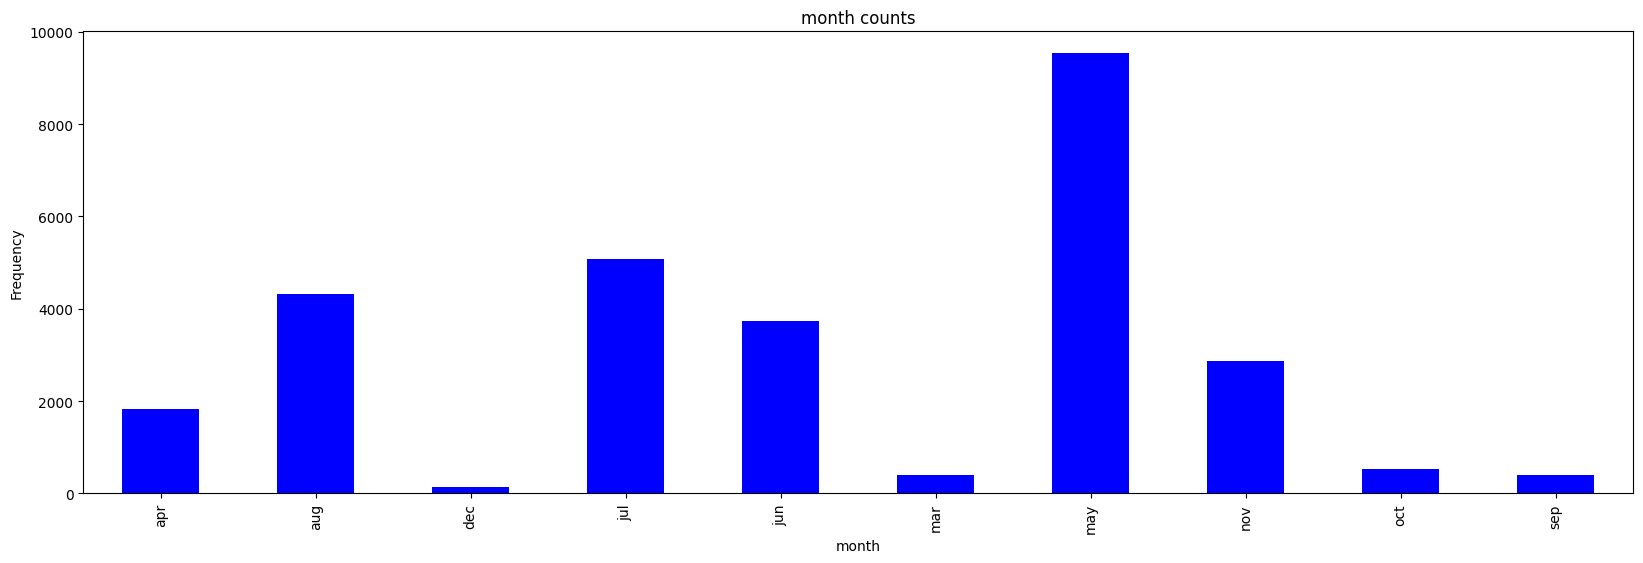

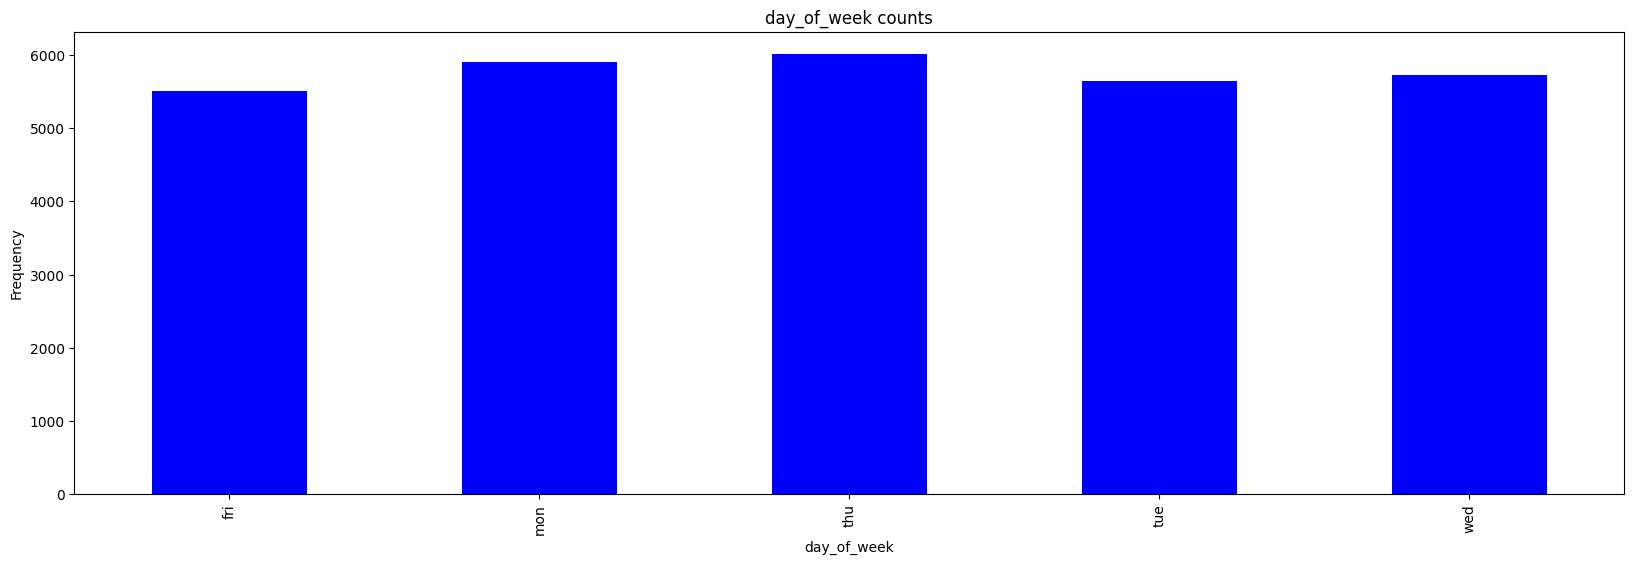

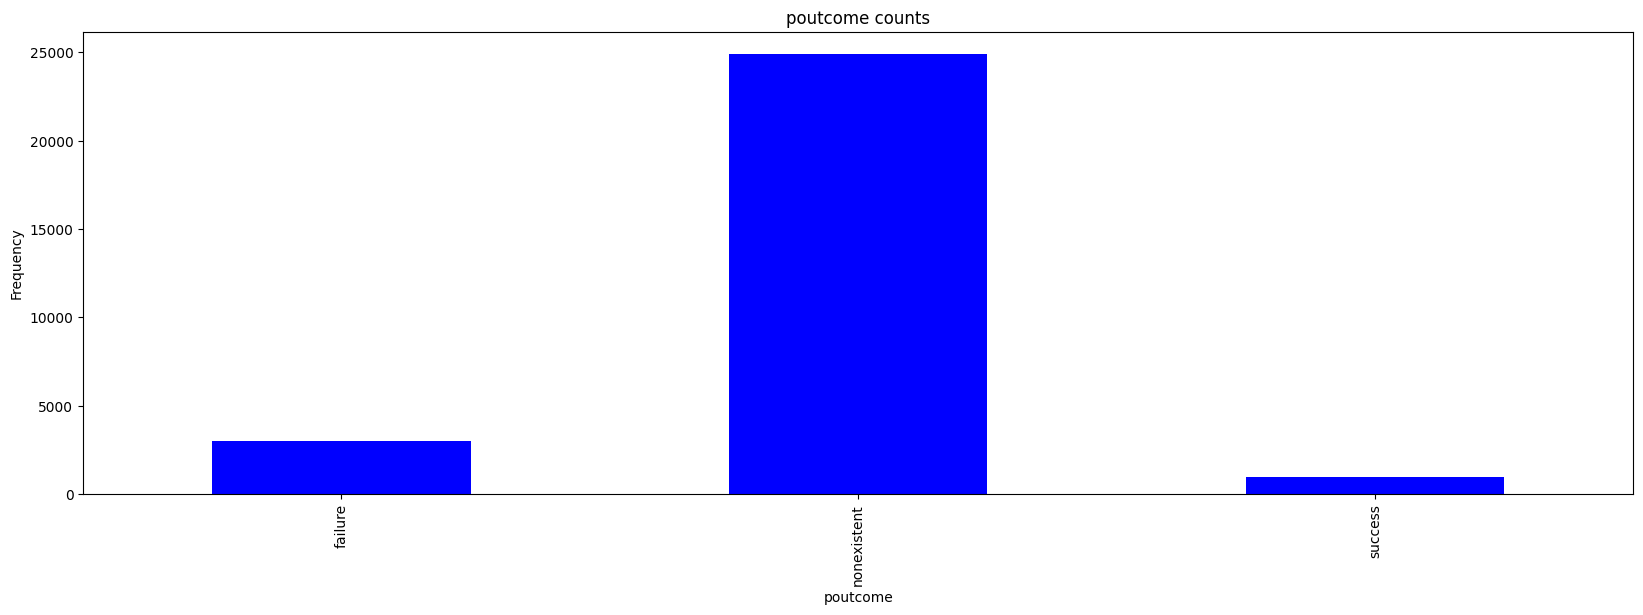

In [8]:
for columns in categorical_features:
    counts = data[columns].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='Blue')
    ax.set_title(columns + ' counts')
    ax.set_xlabel(columns)
    ax.set_ylabel("Frequency")
plt.show()

Also, the pandas profiling report let's you do a general exploratory analysis

In [10]:
#Profile the train data
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Training Dataset Exploratory Analysis", html={'style': {'full_width': True}}, sort=None)
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'pandas_profiling'

# Feature Selection Using Pearson Correlation

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [15]:
# Apply Label Encoding to data
# Import Library
from sklearn.preprocessing import LabelEncoder

# Encode data
data_encoded = data.copy()

job_encoder = LabelEncoder()
data_encoded['job'] = job_encoder.fit_transform(data_encoded['job'])

marital_encoder = LabelEncoder()
data_encoded['marital'] = marital_encoder.fit_transform(data_encoded['marital'])

education_encoder = LabelEncoder()
data_encoded['education'] = education_encoder.fit_transform(data_encoded['education'])

default_encoder = LabelEncoder()
data_encoded['default'] = default_encoder.fit_transform(data_encoded['default'])

loan_encoder = LabelEncoder()
data_encoded['loan'] = loan_encoder.fit_transform(data_encoded['loan'])

housing_encoder = LabelEncoder()
data_encoded['housing'] = housing_encoder.fit_transform(data_encoded['housing'])

contact_encoder = LabelEncoder()
data_encoded['contact'] = contact_encoder.fit_transform(data_encoded['contact'])

month_encoder = LabelEncoder()
data_encoded['month'] = month_encoder.fit_transform(data_encoded['month'])

day_of_week_encoder = LabelEncoder()
data_encoded['day_of_week'] = day_of_week_encoder.fit_transform(data_encoded['day_of_week'])

poutcome_encoder = LabelEncoder()
data_encoded['poutcome'] = poutcome_encoder.fit_transform(data_encoded['poutcome'])

# Print first 10 rows
data_encoded.head(10)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,0,1,6,0,0,0,0,2,...,3,999,1,0,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,9,2,6,0,0,0,1,6,...,4,999,0,1,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,1,1,1,1,2,0,1,6,...,2,999,0,1,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,7,1,6,0,0,0,0,6,...,1,999,1,0,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,0,2,3,0,0,0,0,6,...,9,999,0,1,-1.77,46.4465,-32.34,2.252,5099.1,0
5,customer_id_24606,48,2,1,6,0,2,2,0,7,...,2,999,1,0,-0.07,46.6000,-29.40,5.193,5195.8,0
6,customer_id_13094,34,1,2,0,1,0,0,0,3,...,2,999,0,1,1.43,46.9590,-29.89,5.964,5228.1,0
7,customer_id_36912,34,9,2,5,0,0,0,0,4,...,1,999,0,1,-2.87,46.4815,-28.56,2.217,5076.2,0
8,customer_id_27834,39,10,2,6,0,2,0,0,5,...,1,999,0,1,-1.77,46.4215,-35.00,2.642,5099.1,0
9,customer_id_9302,40,9,2,5,0,1,1,1,4,...,3,999,0,1,1.43,47.2325,-29.26,5.969,5228.1,0


In [17]:
#Remove customer_id column from encoded columns
data_encoded.drop('customer_id', axis = 1, inplace = True)

In [18]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  int64  
 2   marital         28831 non-null  int64  
 3   education       28831 non-null  int64  
 4   default         28831 non-null  int64  
 5   housing         28831 non-null  int64  
 6   loan            28831 non-null  int64  
 7   contact         28831 non-null  int64  
 8   month           28831 non-null  int64  
 9   day_of_week     28831 non-null  int64  
 10  duration        28831 non-null  float64
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  int64  
 15  emp_var_rate    28831 non-null  float64
 16  cons_price_idx  28831 non-null  float64
 17  cons_conf_idx   28831 non-null 

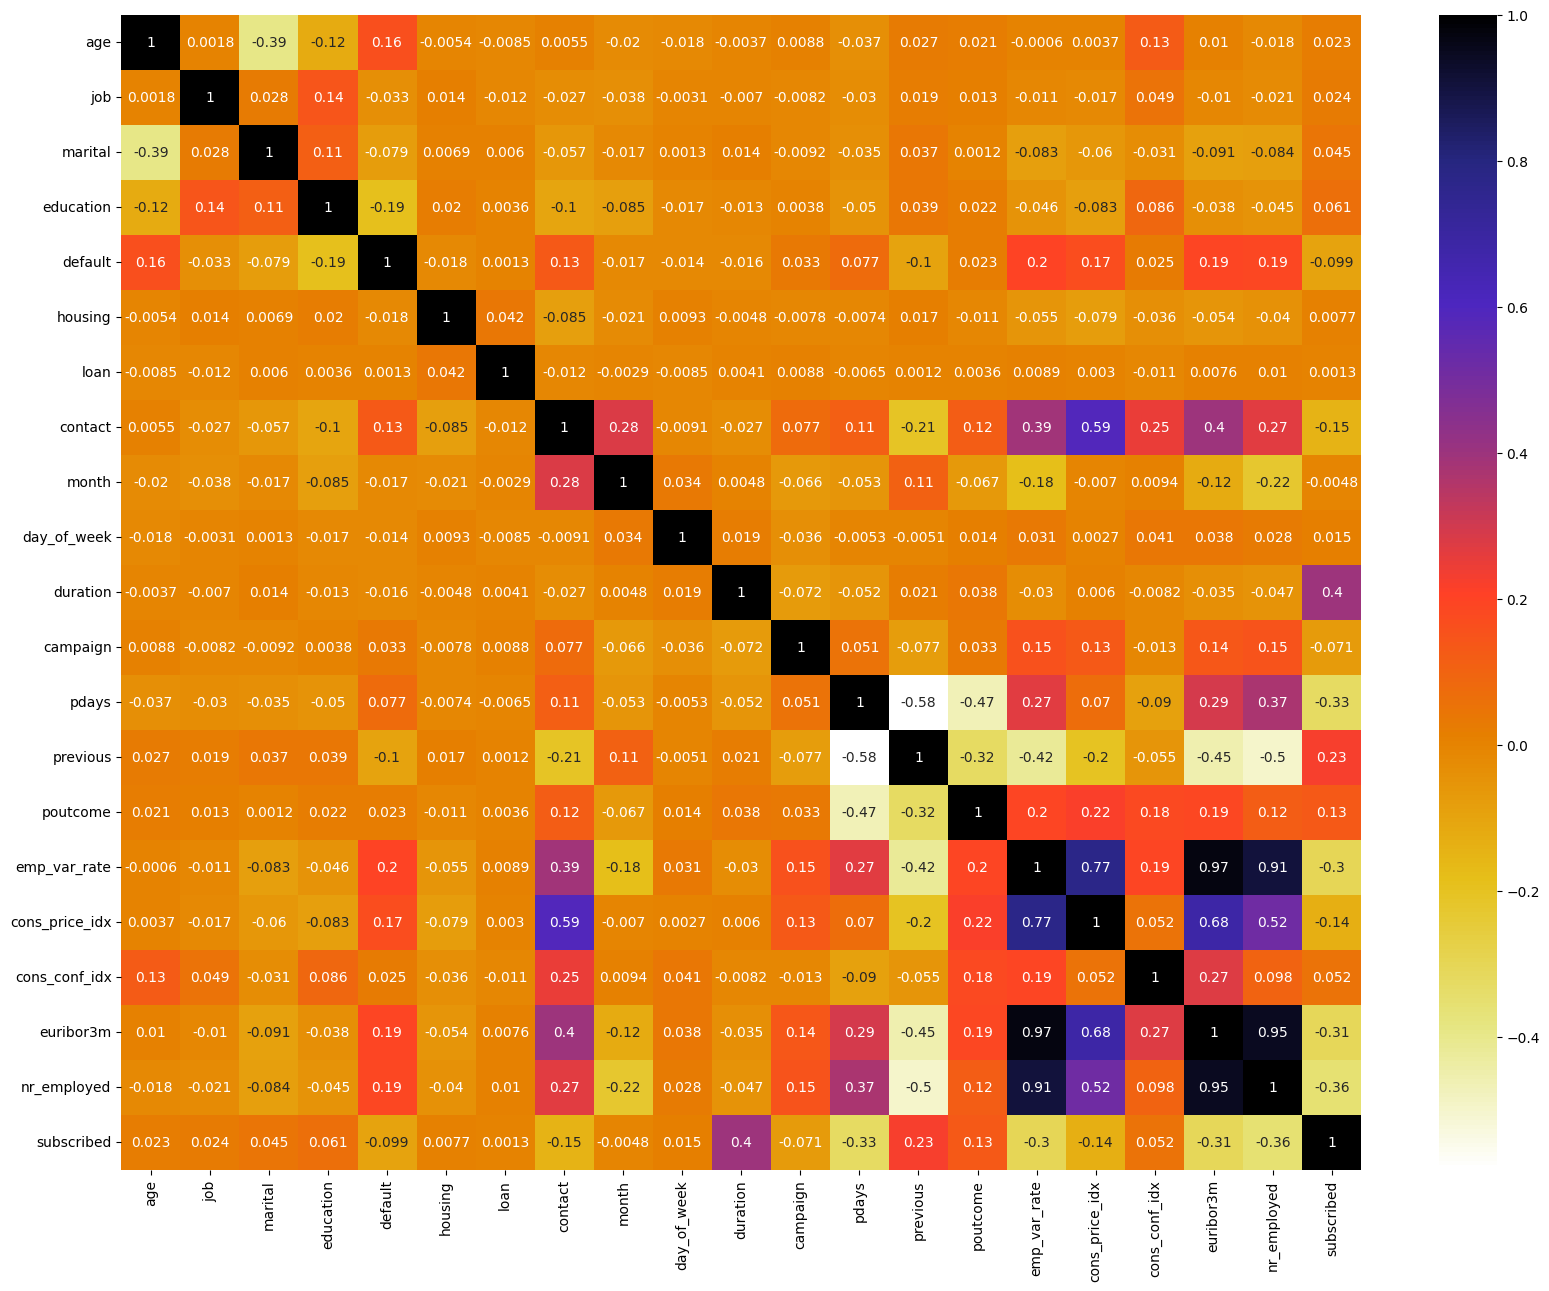

In [19]:
import seaborn as sns

# Apply Pearson Correlation
plt.figure(figsize=(20,15))
cor = data_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

With the following function we can select highly correlated features. It will remove the first feature that is correlated with any other feature

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  #Set all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # We are interested in absolute coefficient value
                colname = corr_matrix.columns[i]   # Getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
correlated_features = correlation(data_encoded, 0.01)
correlated_features

{'campaign',
 'cons_conf_idx',
 'cons_price_idx',
 'contact',
 'day_of_week',
 'default',
 'duration',
 'education',
 'emp_var_rate',
 'euribor3m',
 'housing',
 'loan',
 'marital',
 'month',
 'nr_employed',
 'pdays',
 'poutcome',
 'previous',
 'subscribed'}

# Train-Test Splitting

In [23]:
# Split Data into Features and Label
X = data_encoded[list(correlated_features)].drop('subscribed', axis = 1)
y = data_encoded.subscribed

print(X.head())
print(y.head())

   nr_employed  marital  cons_price_idx  poutcome  campaign  education  \
0       5023.5        1         46.3565         0         3          6   
1       5099.1        2         46.4465         1         4          6   
2       5191.0        1         46.9970         1         2          1   
3       5099.1        1         46.4465         0         1          6   
4       5099.1        2         46.4465         1         9          3   

   day_of_week  pdays  contact   duration  euribor3m  emp_var_rate  \
0            1    999        0   1.283333      1.711         -2.97   
1            0    999        1   0.200000      2.252         -1.77   
2            2    999        1   4.616667      5.862          1.13   
3            2    999        0   1.166667      2.329         -1.77   
4            0    999        0  19.683333      2.252         -1.77   

   cons_conf_idx  housing  month  default  loan  previous  
0         -23.10        0      2        0     0         1  
1         -32.

In [24]:
# Split dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=data_encoded.subscribed)

# Functions Used in Model Evaluation

In [25]:
def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'Blues')
    plt.xlabel('Predicted Value', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Actual Value', fontsize = 13)
    plt.title('A confusion matrix');

In [26]:
def Classification_Report(ytest, ypred):
    from sklearn.metrics import classification_report
    cr = classification_report(ytest, ypred)
    return cr

# Logistic Regressor

In [27]:
# Import Library
from sklearn.linear_model import LogisticRegression

# Create regressor
regressor = LogisticRegression()

# Train the data
lr_model = regressor.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Get predictions from test data
lr_predictions = lr_model.predict(X_test)

# Evaluate Model
lr_report = Classification_Report(y_test, lr_predictions)
print(lr_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5117
           1       0.61      0.35      0.44       650

    accuracy                           0.90      5767
   macro avg       0.77      0.66      0.69      5767
weighted avg       0.89      0.90      0.89      5767



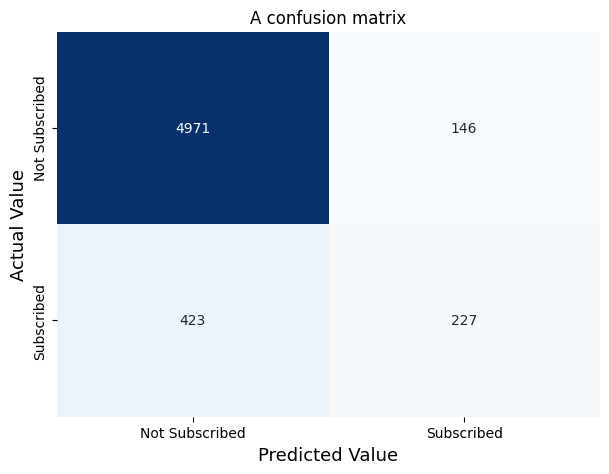

In [29]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, lr_predictions, label = ['Not Subscribed', 'Subscribed'])

# Random Forest Model

In [30]:
# Import Library
from sklearn.ensemble import RandomForestClassifier

# Create Randome Forest Classifier
Random_Forest = RandomForestClassifier()

# Create Randome Forest Model
RF_model = Random_Forest.fit(X_train, y_train)
print(RF_model)

RandomForestClassifier()


In [31]:
# Get predictions from Random Forest Model
RF_predictions = RF_model.predict(X_test)

# Evaluate Predictions
RF_report = Classification_Report(y_test, RF_predictions)
print(RF_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5117
           1       0.63      0.51      0.56       650

    accuracy                           0.91      5767
   macro avg       0.78      0.73      0.76      5767
weighted avg       0.90      0.91      0.91      5767



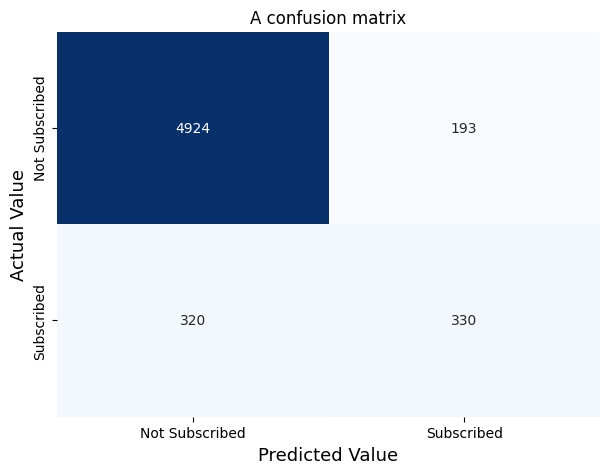

In [32]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, RF_predictions, label = ['Not Subscribed', 'Subscribed'])

# Support Vector Machine

In [33]:
# Import Library
from sklearn.svm import SVC

# Create Vector Machine
svm_machine = SVC()

# Create Model
svm_model = svm_machine.fit(X_train, y_train)
print(svm_model)

SVC()


In [34]:
# Make Predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate Prediction
svm_report = Classification_Report(y_test, svm_predictions)
print(svm_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      5117
           1       0.65      0.20      0.30       650

    accuracy                           0.90      5767
   macro avg       0.78      0.59      0.62      5767
weighted avg       0.88      0.90      0.87      5767



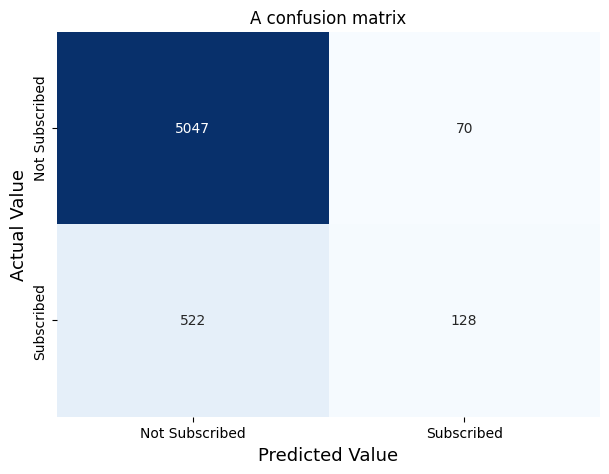

In [35]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, svm_predictions, label = ['Not Subscribed', 'Subscribed'])

# K-Nearest Neighbor

In [36]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier

# Create KNN algorithm
knn = KNeighborsClassifier()

# Create KNN Model
knn_model = knn.fit(X_train, y_train)
print(knn_model)

KNeighborsClassifier()


In [37]:
# Make Predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate Predictions
knn_report = Classification_Report(y_test, knn_predictions)
print(knn_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5117
           1       0.60      0.51      0.55       650

    accuracy                           0.91      5767
   macro avg       0.77      0.73      0.75      5767
weighted avg       0.90      0.91      0.90      5767



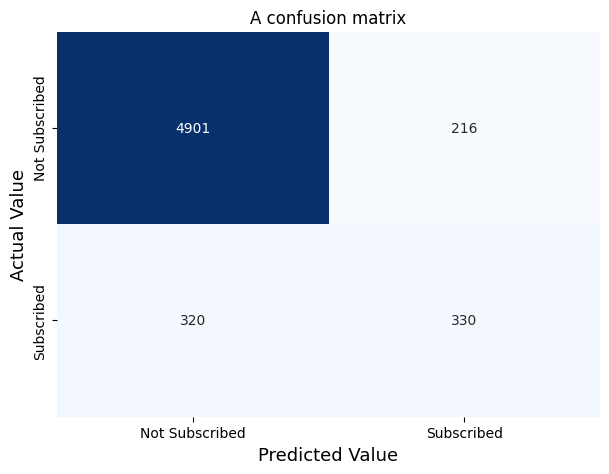

In [38]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, knn_predictions, label = ['Not Subscribed', 'Subscribed'])

# Decision Tree

In [39]:
# Import Library
from sklearn.tree import DecisionTreeClassifier

# Create Classifier
Tree = DecisionTreeClassifier()

# Create Decision Tree Model
Tree_model = Tree.fit(X_train, y_train)
print(Tree_model)

DecisionTreeClassifier()


In [40]:
# Make Predictions
Tree_predictions = Tree_model.predict(X_test)

# Evaluate Predictions
Tree_report = Classification_Report(y_test, Tree_predictions)
print(Tree_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5117
           1       0.53      0.52      0.52       650

    accuracy                           0.89      5767
   macro avg       0.73      0.73      0.73      5767
weighted avg       0.89      0.89      0.89      5767



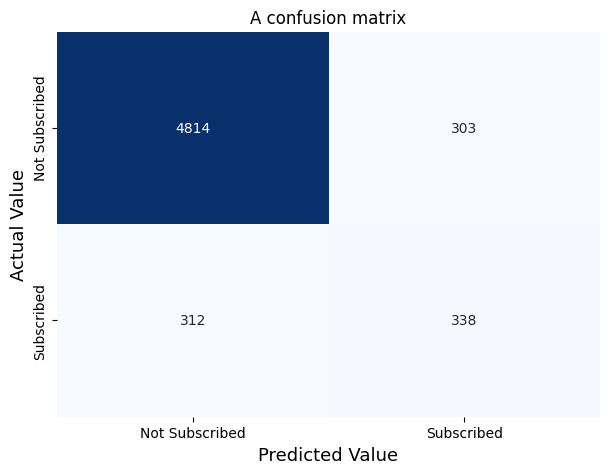

In [41]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, Tree_predictions, label = ['Not Subscribed', 'Subscribed'])

# Gradient Boost Classifier

In [42]:
# Import Libraries
from sklearn.ensemble import GradientBoostingClassifier

# Create Classifier
GB_classifier = GradientBoostingClassifier()

# Create Gradient Boost Model
GB_model = GB_classifier.fit(X_train, y_train)
print(GB_model)

GradientBoostingClassifier()


In [43]:
# Make predictions
GB_predictions = GB_model.predict(X_test)

# Evaluate Predictions
GB_report = Classification_Report(y_test, GB_predictions)
print(GB_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5117
           1       0.66      0.53      0.59       650

    accuracy                           0.92      5767
   macro avg       0.80      0.75      0.77      5767
weighted avg       0.91      0.92      0.91      5767



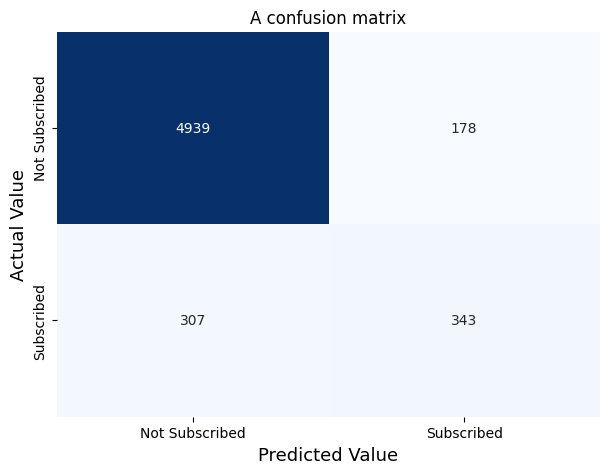

In [44]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, GB_predictions, label = ['Not Subscribed', 'Subscribed'])

Gradient Boost Algorithm is the best performing Model

# XG Boost

In [45]:
# Import Libraries
from xgboost import XGBClassifier

# Create Classifier
xg_boost = XGBClassifier(use_label_encoder=False)

# Create Gradient Boost Model
XG_model = xg_boost.fit(X_train, y_train)
print(XG_model)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [46]:
# Make predictions
XG_predictions = xg_boost.predict(X_test)

# Evaluate Predictions
XG_report = Classification_Report(y_test, XG_predictions)
print(XG_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5117
           1       0.62      0.52      0.57       650

    accuracy                           0.91      5767
   macro avg       0.78      0.74      0.76      5767
weighted avg       0.90      0.91      0.91      5767



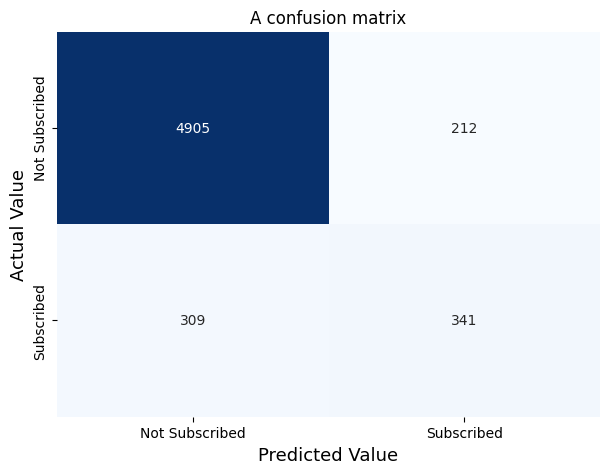

In [47]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, XG_predictions, label = ['Not Subscribed', 'Subscribed'])

# Ensembling

In [48]:
from sklearn.ensemble import VotingClassifier

# Models to use for ensembling
model1 = XGBClassifier(use_label_encoder=False)
model2 = GradientBoostingClassifier()

#fitting the model
ensemble_model = VotingClassifier(estimators=[('XG', model1), ('GB', model2)], voting='soft')
ensemble_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:20:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('XG',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('GB', GradientBoostingClassifier())],
                 voting='soft')

In [49]:
# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate Predictions
ensemble_report = Classification_Report(y_test, ensemble_predictions)
print(ensemble_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5117
           1       0.63      0.52      0.57       650

    accuracy                           0.91      5767
   macro avg       0.79      0.74      0.76      5767
weighted avg       0.91      0.91      0.91      5767



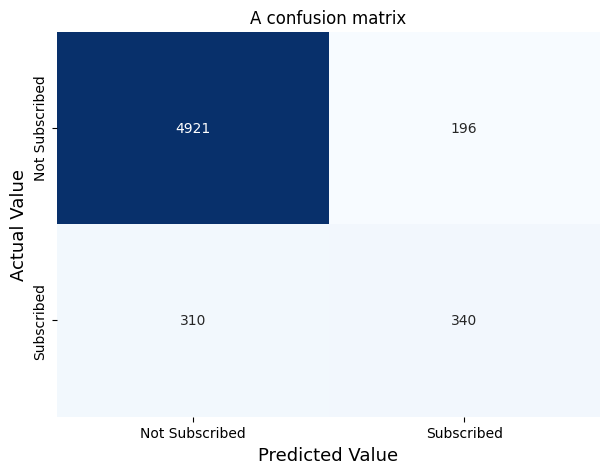

In [50]:
# Use Confusion Matrix For Model Evaluation
ConfusionMatrix(y_test, ensemble_predictions, label = ['Not Subscribed', 'Subscribed'])

# Save The Model

In [51]:
import pickle

In [52]:
saved_model = {"model": GB_model, "marital_encoder": marital_encoder, "education_encoder": education_encoder, "default_encoder": default_encoder, "loan_encoder": loan_encoder,
               "housing_encoder": housing_encoder , "contact_encoder": contact_encoder, "month_encoder": month_encoder, 'day_of_week_encoder': day_of_week_encoder, 'poutcome_encoder': poutcome_encoder}

with open('Gradient_Boost_Model.pkl', 'wb') as file:
    pickle.dump(saved_model,file)

# Load and Test the Model

In [ ]:
# Load the model
with open('Gradient_Boost_Model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

model = saved_model["model"]

marital_encode = saved_model["marital_encoder"]
education_encode = saved_model["education_encoder"]
default_encode = saved_model["default_encoder"]
loan_encode = saved_model["loan_encoder"]
housing_encode = saved_model["housing_encoder"]
contact_encode = saved_model["contact_encoder"]
month_encode = saved_model["month_encoder"]
day_of_week_encode = saved_model["day_of_week_encoder"]
poutcome_encode = saved_model["poutcome_encoder"]


# Predicting The Test Data

In [ ]:
# Load data
dataset = pd.read_csv('test.csv')
dataset.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [ ]:
dataset = dataset[['campaign', 'cons_conf_idx', 'cons_price_idx', 'contact', 'day_of_week', 'default', 'duration', 'education', 'emp_var_rate', 'euribor3m', 'housing', 'loan', 'marital',
                    'month', 'nr_employed', 'pdays', 'poutcome', 'previous']]
dataset.head()

,campaign,cons_conf_idx,cons_price_idx,contact,day_of_week,default,duration,education,emp_var_rate,euribor3m,housing,loan,marital,month,nr_employed,pdays,poutcome,previous
0,1,-32.34,46.4465,cellular,mon,no,6.183333,high.school,-1.77,2.301,no,yes,married,may,5099.1,999,failure,1
1,2,-25.48,46.9970,telephone,thu,unknown,4.750000,unknown,1.13,5.862,yes,no,married,may,5191.0,999,nonexistent,0
2,1,-32.34,46.4465,cellular,fri,no,0.866667,basic.9y,-1.77,2.315,no,no,married,may,5099.1,999,failure,1
3,4,-29.26,47.2325,telephone,fri,no,5.916667,high.school,1.43,5.969,no,no,married,jun,5228.1,999,nonexistent,0
4,2,-29.89,46.9590,cellular,fri,no,3.150000,high.school,1.43,5.965,yes,no,married,jul,5228.1,999,nonexistent,0


In [ ]:
dataset.contact = contact_encode.transform(dataset.contact)
dataset.day_of_week = day_of_week_encode.transform(dataset.day_of_week)
dataset.default = default_encode.transform(dataset.default)
dataset.education = education_encode.transform(dataset.education)
dataset.housing = housing_encode.transform(dataset.housing)
dataset.loan = loan_encode.transform(dataset.loan)
dataset.marital = marital_encode.transform(dataset.marital)
dataset.month = month_encode.transform(dataset.month)
dataset.poutcome = poutcome_encode.transform(dataset.poutcome)

In [ ]:
dataset.head()

,campaign,cons_conf_idx,cons_price_idx,contact,day_of_week,default,duration,education,emp_var_rate,euribor3m,housing,loan,marital,month,nr_employed,pdays,poutcome,previous
0,1,-32.34,46.4465,0,1,0,6.183333,3,-1.77,2.301,0,2,1,6,5099.1,999,0,1
1,2,-25.48,46.9970,1,2,1,4.750000,7,1.13,5.862,2,0,1,6,5191.0,999,1,0
2,1,-32.34,46.4465,0,0,0,0.866667,2,-1.77,2.315,0,0,1,6,5099.1,999,0,1
3,4,-29.26,47.2325,1,0,0,5.916667,3,1.43,5.969,0,0,1,4,5228.1,999,1,0
4,2,-29.89,46.9590,0,0,0,3.150000,3,1.43,5.965,2,0,1,3,5228.1,999,1,0


In [ ]:
prediction = model.predict(dataset)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
data[correlated_features].describe()